In [1]:
# General
import xarray as xr    # handles netcdf data
import numpy as np     # numerical functions etc
import pandas as pd    # dataframes
import matplotlib      # plotting functions
import matplotlib.pyplot as plt    # specific plotting function I use a lot   
from matplotlib.patches import Rectangle     # specific plotting function with an annoyingly long name
import matplotlib.gridspec as gridspec #to define the sizes of plots specifically
import geopandas as gpd    # shapefiles
import cartopy     # plotting geographical features
from shapely.geometry import MultiPolygon, Polygon #to deal with 3D polygons
import regionmask    # convert shapefile to binary 0,1 mask
import re     # regular expressions (replace substrings etc)
from geopy.geocoders import Nominatim    # get lat & lon coordinates from a place name

#for climate indices
import xclim.indices as xc_i
import xclim as xc

#For plotting
import matplotlib.ticker as plticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import nc_time_axis #to plot cf.time axis
import cftime #to plot cf.time axis

#For Statistics
import scipy.stats as stats
from scipy import optimize
from xclim.indices.stats import fit
from scipy.stats import norm, gamma
import lmoments3.distr                     # conda activate xclim; pip install git+https://github.com/OpenHydrology/lmoments3.git
glo = getattr(lmoments3.distr, "glo")

#For copulas
import sklarpy.univariate as sk_uni
from sklarpy.copulas import gh_copula
from sklarpy.multivariate import mvt_normal
from sklarpy.copulas import MarginalFitter
from sklarpy.univariate import UnivariateFitter
from sklarpy import print_full
from sklarpy.copulas import gumbel_copula
from sklarpy.copulas import frank_copula
from sklarpy.copulas import clayton_copula

#For handling errors
import sys
import warnings

### Load Shapefiles

In [2]:
# This step is neccessary to obtain the longitude and latitude values
fn_tmin = '/rds/general/user/nmerz/home/MSc_Diss/data/AR6_regions/obs/era5/model_data/era5_tmin_daily_275-330E_15--60N_su.nc'
ds_tmin = xr.open_dataset(fn_tmin).sel(time=slice("1950","2023"))
era5_tmin = ds_tmin.tmin

sf_all = gpd.read_file("/rds/general/user/nmerz/home/MSc_Diss/data/AR6_regions/shapefile").to_crs(cartopy.crs.PlateCarree())
sf_SA = sf_all[sf_all['Acronym'].str.contains("NWS|NSA|NES|SAM|SWS|SES|SSA")]
rm_SA = regionmask.mask_3D_geopandas(sf_SA, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_9 = sf_all[sf_all['Acronym'].str.contains("NWS")]
rm_9 = regionmask.mask_3D_geopandas(sf_9, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_10 = sf_all[sf_all['Acronym'].str.contains("NSA")]
rm_10 = regionmask.mask_3D_geopandas(sf_10, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_11 = sf_all[sf_all['Acronym'].str.contains("NES")]
rm_11 = regionmask.mask_3D_geopandas(sf_11, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_12 = sf_all[sf_all['Acronym'].str.contains("SAM")]
rm_12 = regionmask.mask_3D_geopandas(sf_12, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_13 = sf_all[sf_all['Acronym'].str.contains("SWS")]
rm_13 = regionmask.mask_3D_geopandas(sf_13, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_14 = sf_all[sf_all['Acronym'].str.contains("SES")]
rm_14 = regionmask.mask_3D_geopandas(sf_14, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)
sf_15 = sf_all[sf_all['Acronym'].str.contains("SSA")]
rm_15 = regionmask.mask_3D_geopandas(sf_15, era5_tmin.lon, era5_tmin.lat).squeeze(drop = True)

### Load the data

In [3]:
dir_data = '/rds/general/user/nmerz/home/MSc_Diss/data/AR6_regions/obs/era5/'
model_name = 'era5'

In [4]:
loaded = True
if loaded == True:
    fn_spei_M1_9 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M1_9.nc'
    spei_M1_raw_9 = xr.open_dataset(fn_spei_M1_9)
    spei_M1_9 = spei_M1_raw_9.spei
    spei_M1_arr_9 = spei_M1_9.to_numpy()
    time_spei_M1_arr_9 = spei_M1_9.time.to_numpy()
    spei_M1_arr_pos_9 = spei_M1_arr_9>=0
    spei_M1_arr_neg_9 = spei_M1_arr_9<=0
    fn_spei_M1_10 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M1_10.nc'
    spei_M1_raw_10 = xr.open_dataset(fn_spei_M1_10)
    spei_M1_10 = spei_M1_raw_10.spei
    spei_M1_arr_10 = spei_M1_10.to_numpy()
    time_spei_M1_arr_10 = spei_M1_10.time.to_numpy()
    spei_M1_arr_pos_10 = spei_M1_arr_10>=0
    spei_M1_arr_neg_10 = spei_M1_arr_10<=0
    fn_spei_M1_11 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M1_11.nc'
    spei_M1_raw_11 = xr.open_dataset(fn_spei_M1_11)
    spei_M1_11 = spei_M1_raw_11.spei
    spei_M1_arr_11 = spei_M1_11.to_numpy()
    time_spei_M1_arr_11 = spei_M1_11.time.to_numpy()
    spei_M1_arr_pos_11 = spei_M1_arr_11>=0
    spei_M1_arr_neg_11 = spei_M1_arr_11<=0
    fn_spei_M1_12 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M1_12.nc'
    spei_M1_raw_12 = xr.open_dataset(fn_spei_M1_12)
    spei_M1_12 = spei_M1_raw_12.spei
    spei_M1_arr_12 = spei_M1_12.to_numpy()
    time_spei_M1_arr_12 = spei_M1_12.time.to_numpy()
    spei_M1_arr_pos_12 = spei_M1_arr_12>=0
    spei_M1_arr_neg_12 = spei_M1_arr_12<=0
    fn_spei_M1_13 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M1_13.nc'
    spei_M1_raw_13 = xr.open_dataset(fn_spei_M1_13)
    spei_M1_13 = spei_M1_raw_13.spei
    spei_M1_arr_13 = spei_M1_13.to_numpy()
    time_spei_M1_arr_13 = spei_M1_13.time.to_numpy()
    spei_M1_arr_pos_13 = spei_M1_arr_13>=0
    spei_M1_arr_neg_13 = spei_M1_arr_13<=0
    fn_spei_M1_14 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M1_14.nc'
    spei_M1_raw_14 = xr.open_dataset(fn_spei_M1_14)
    spei_M1_14 = spei_M1_raw_14.spei
    spei_M1_arr_14 = spei_M1_14.to_numpy()
    time_spei_M1_arr_14 = spei_M1_14.time.to_numpy()
    spei_M1_arr_pos_14 = spei_M1_arr_14>=0
    spei_M1_arr_neg_14 = spei_M1_arr_14<=0
    fn_spei_M1_15 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M1_15.nc'
    spei_M1_raw_15 = xr.open_dataset(fn_spei_M1_15)
    spei_M1_15 = spei_M1_raw_15.spei
    spei_M1_arr_15 = spei_M1_15.to_numpy()
    time_spei_M1_arr_15 = spei_M1_15.time.to_numpy()
    spei_M1_arr_pos_15 = spei_M1_arr_15>=0
    spei_M1_arr_neg_15 = spei_M1_arr_15<=0

In [5]:
loaded = True
if loaded == True:
    fn_spei_M1_9 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M6_9.nc'
    spei_M1_raw_9 = xr.open_dataset(fn_spei_M1_9)
    spei_M1_9 = spei_M1_raw_9.spei
    spei_M6_arr_9 = spei_M1_9.to_numpy()
    time_spei_M6_arr_9 = spei_M1_9.time.to_numpy()
    fn_spei_M1_10 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M6_10.nc'
    spei_M1_raw_10 = xr.open_dataset(fn_spei_M1_10)
    spei_M1_10 = spei_M1_raw_10.spei
    spei_M6_arr_10 = spei_M1_10.to_numpy()
    time_spei_M6_arr_10 = spei_M1_10.time.to_numpy()
    fn_spei_M1_11 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M6_11.nc'
    spei_M1_raw_11 = xr.open_dataset(fn_spei_M1_11)
    spei_M1_11 = spei_M1_raw_11.spei
    spei_M6_arr_11 = spei_M1_11.to_numpy()
    time_spei_M6_arr_11 = spei_M1_11.time.to_numpy()
    fn_spei_M1_12 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M6_12.nc'
    spei_M1_raw_12 = xr.open_dataset(fn_spei_M1_12)
    spei_M1_12 = spei_M1_raw_12.spei
    spei_M6_arr_12 = spei_M1_12.to_numpy()
    time_spei_M6_arr_12 = spei_M1_12.time.to_numpy()
    fn_spei_M1_13 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M6_13.nc'
    spei_M1_raw_13 = xr.open_dataset(fn_spei_M1_13)
    spei_M1_13 = spei_M1_raw_13.spei
    spei_M6_arr_13 = spei_M1_13.to_numpy()
    time_spei_M6_arr_13 = spei_M1_13.time.to_numpy()
    fn_spei_M1_14 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M6_14.nc'
    spei_M1_raw_14 = xr.open_dataset(fn_spei_M1_14)
    spei_M1_14 = spei_M1_raw_14.spei
    spei_M6_arr_14 = spei_M1_14.to_numpy()
    time_spei_M6_arr_14 = spei_M1_14.time.to_numpy()
    fn_spei_M1_15 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M6_15.nc'
    spei_M1_raw_15 = xr.open_dataset(fn_spei_M1_15)
    spei_M1_15 = spei_M1_raw_15.spei
    spei_M6_arr_15 = spei_M1_15.to_numpy()
    time_spei_M6_arr_15 = spei_M1_15.time.to_numpy()

In [7]:
loaded = True
if loaded == True:
    fn_spei_M1_9 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M12_9.nc'
    spei_M1_raw_9 = xr.open_dataset(fn_spei_M1_9)
    spei_M1_9 = spei_M1_raw_9.spei
    spei_M12_arr_9 = spei_M1_9.to_numpy()
    time_spei_M12_arr_9 = spei_M1_9.time.to_numpy()
    fn_spei_M1_10 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M12_10.nc'
    spei_M1_raw_10 = xr.open_dataset(fn_spei_M1_10)
    spei_M1_10 = spei_M1_raw_10.spei
    spei_M12_arr_10 = spei_M1_10.to_numpy()
    time_spei_M12_arr_10 = spei_M1_10.time.to_numpy()
    fn_spei_M1_11 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M12_11.nc'
    spei_M1_raw_11 = xr.open_dataset(fn_spei_M1_11)
    spei_M1_11 = spei_M1_raw_11.spei
    spei_M12_arr_11 = spei_M1_11.to_numpy()
    time_spei_M12_arr_11 = spei_M1_11.time.to_numpy()
    fn_spei_M1_12 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M12_12.nc'
    spei_M1_raw_12 = xr.open_dataset(fn_spei_M1_12)
    spei_M1_12 = spei_M1_raw_12.spei
    spei_M12_arr_12 = spei_M1_12.to_numpy()
    time_spei_M12_arr_12 = spei_M1_12.time.to_numpy()
    fn_spei_M1_13 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M12_13.nc'
    spei_M1_raw_13 = xr.open_dataset(fn_spei_M1_13)
    spei_M1_13 = spei_M1_raw_13.spei
    spei_M12_arr_13 = spei_M1_13.to_numpy()
    time_spei_M12_arr_13 = spei_M1_13.time.to_numpy()
    fn_spei_M1_14 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M12_14.nc'
    spei_M1_raw_14 = xr.open_dataset(fn_spei_M1_14)
    spei_M1_14 = spei_M1_raw_14.spei
    spei_M12_arr_14 = spei_M1_14.to_numpy()
    time_spei_M12_arr_14 = spei_M1_14.time.to_numpy()
    fn_spei_M1_15 = dir_data + 'nSPEI_HG85_cal1980_2010/spei_M12_15.nc'
    spei_M1_raw_15 = xr.open_dataset(fn_spei_M1_15)
    spei_M1_15 = spei_M1_raw_15.spei
    spei_M12_arr_15 = spei_M1_15.to_numpy()
    time_spei_M12_arr_15 = spei_M1_15.time.to_numpy()

In [16]:
#Names of the regions for plotting
names_regions = ['NWS','NSA','NES','SAM','SWS','SES','SSA',None]

### Plot Results

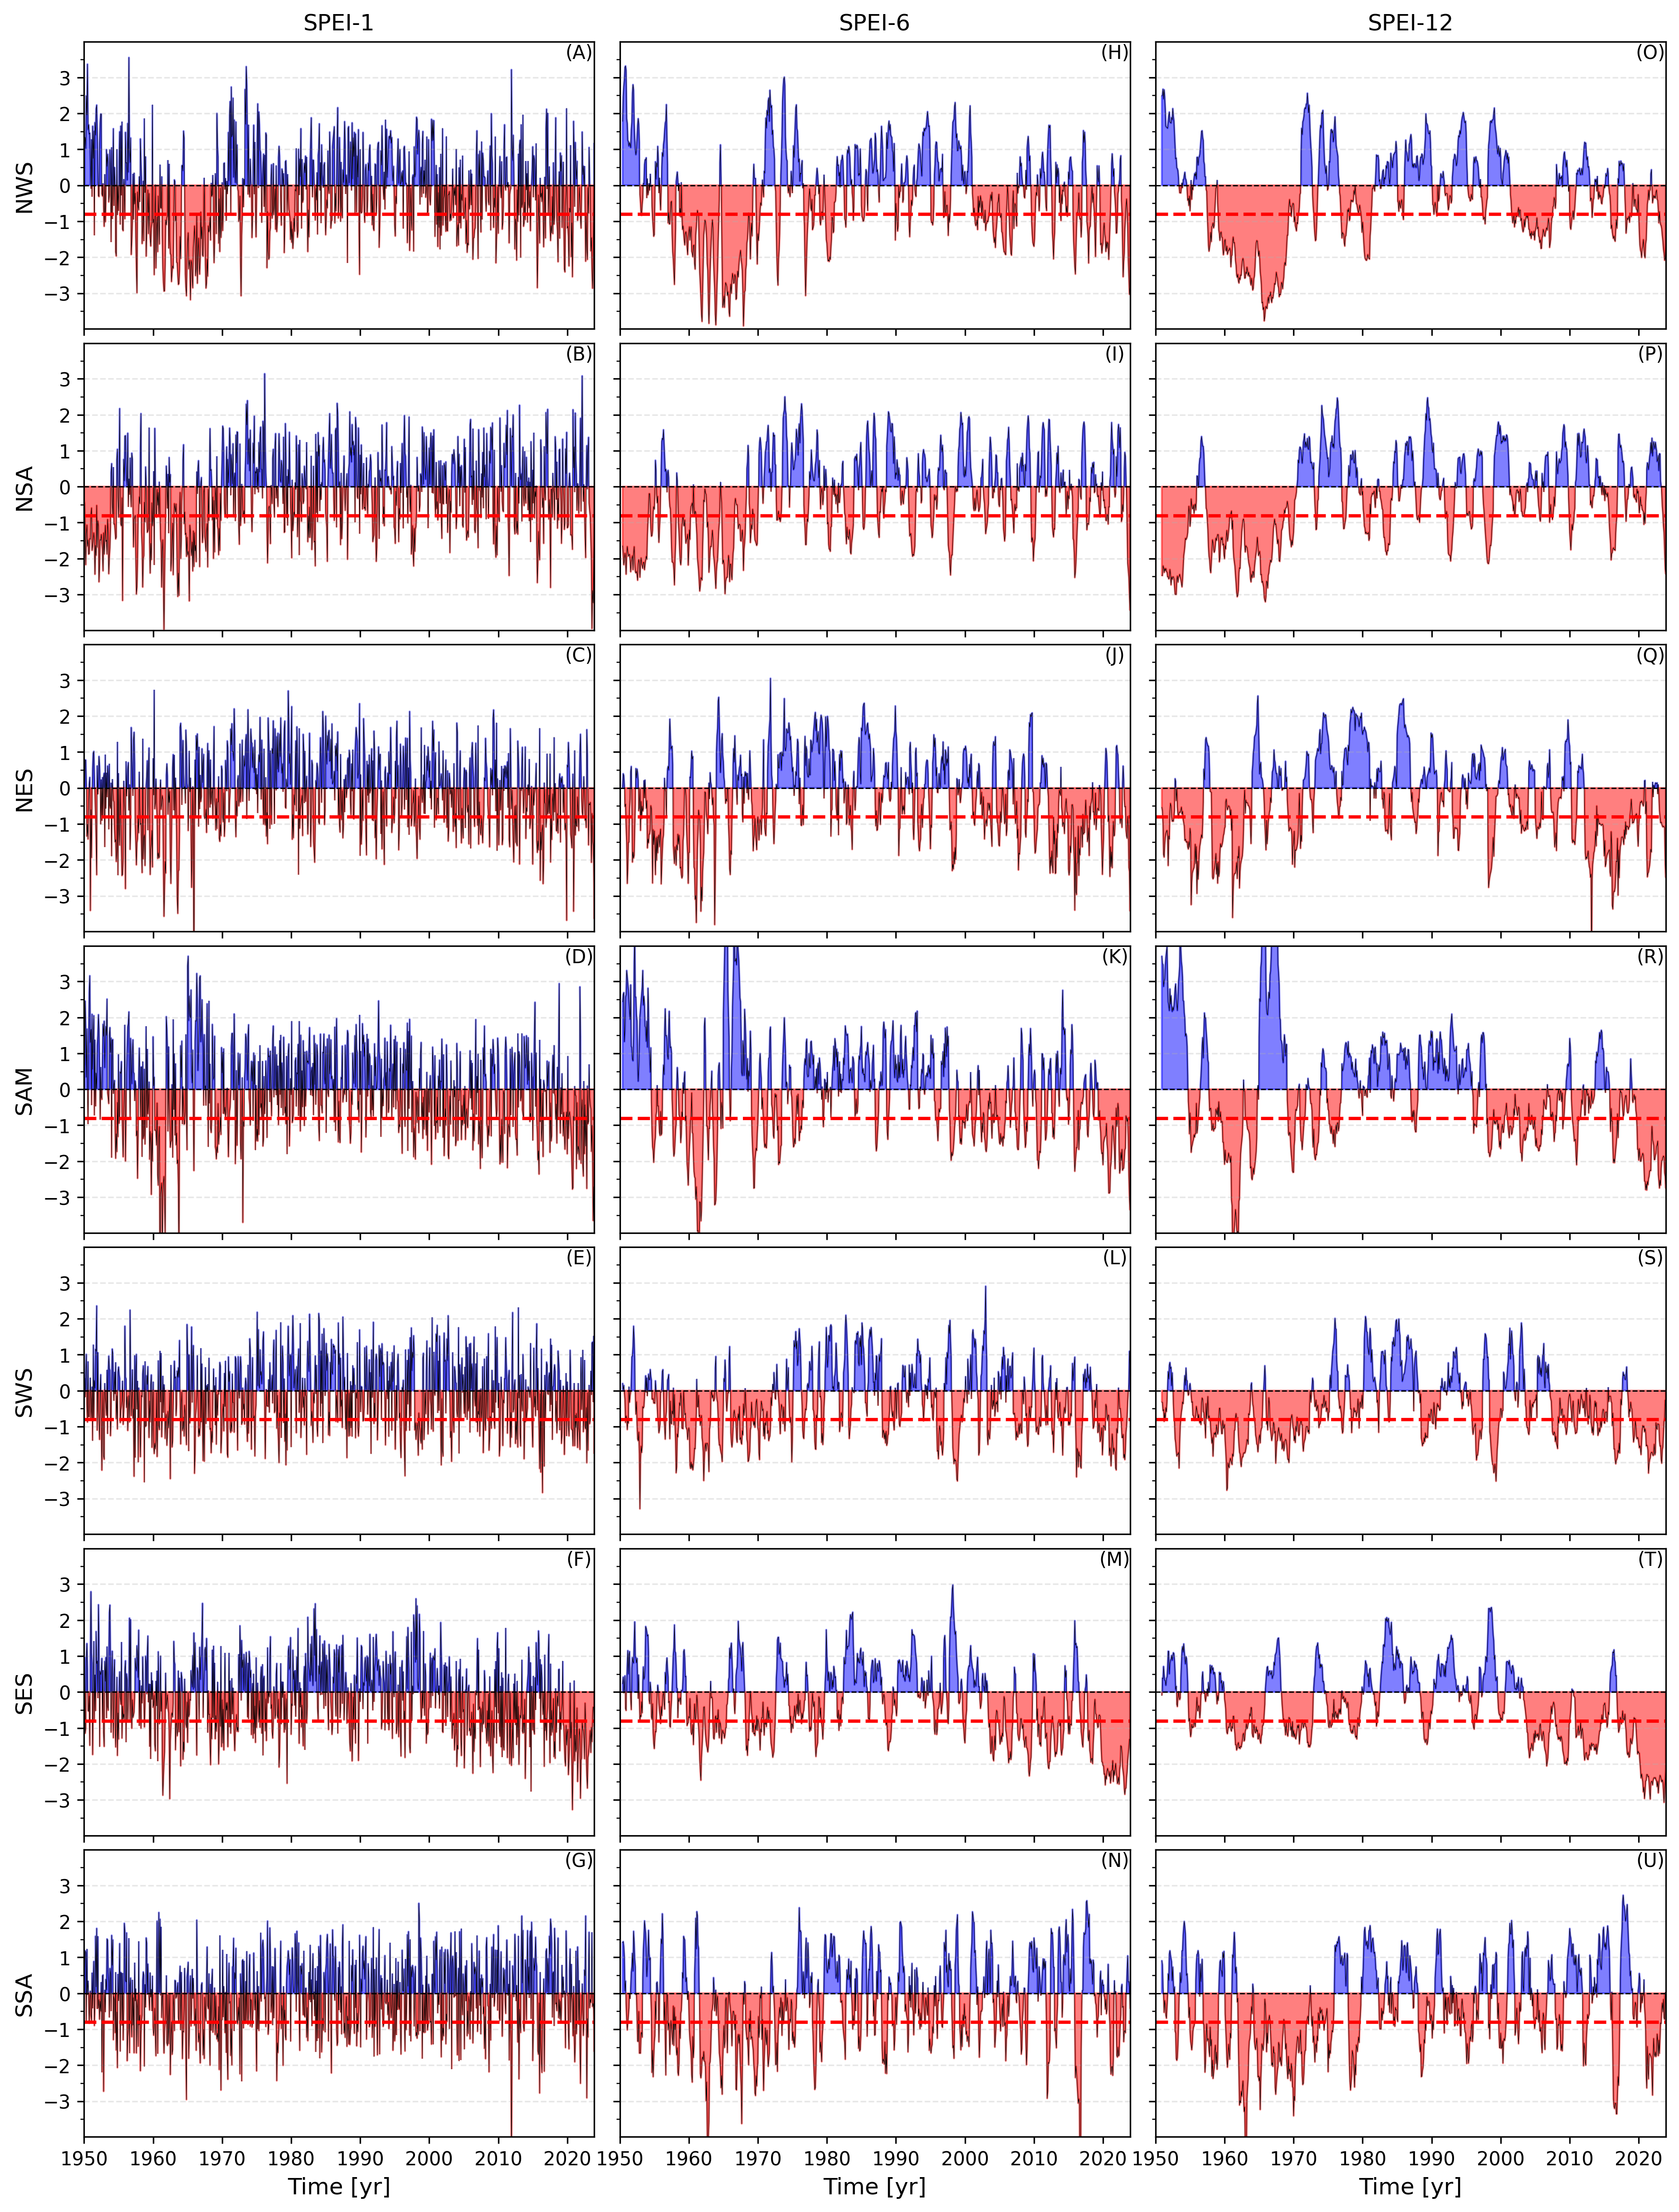

In [15]:
fig, ax = plt.subplots(ncols = 3, nrows = 7,figsize=(15,20),dpi = 300,sharey="row",sharex="col")
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.05)

spei_M1 = spei_M1_arr_9
time_M1 = time_spei_M1_arr_9
spei_M6= spei_M6_arr_9
time_M6 = time_spei_M6_arr_9
spei_M12= spei_M12_arr_9
time_M12 = time_spei_M12_arr_9
ax[0][0].plot(time_M1,spei_M1,label=r'Region 9, M1', color='black',lw=0.25)
ax[0][0].fill_between(time_M1,0,spei_M1,where=spei_M1>=0,color='b',alpha=0.5,interpolate=False)
ax[0][0].fill_between(time_M1,0,spei_M1,where=spei_M1<=0,color='r',alpha=0.5,interpolate=False)
ax[0][1].plot(time_M6,spei_M6,label=r'Region 9, M6', color='black',lw=0.25)
ax[0][1].fill_between(time_M6,0,spei_M6,where=spei_M6>=0,color='b',alpha=0.5,interpolate=False)
ax[0][1].fill_between(time_M6,0,spei_M6,where=spei_M6<=0,color='r',alpha=0.5,interpolate=False)
ax[0][2].plot(time_M12,spei_M12,label=r'Region 9, M12', color='black',lw=0.25)
ax[0][2].fill_between(time_M12,0,spei_M12,where=spei_M12>=0,color='b',alpha=0.5,interpolate=False)
ax[0][2].fill_between(time_M12,0,spei_M12,where=spei_M12<=0,color='r',alpha=0.5,interpolate=False)

spei_M1 = spei_M1_arr_10
time_M1 = time_spei_M1_arr_10
spei_M6= spei_M6_arr_10
time_M6 = time_spei_M6_arr_10
spei_M12= spei_M12_arr_10
time_M12 = time_spei_M12_arr_10
ax[1][0].plot(time_M1,spei_M1,label=r'Region 10, M1', color='black',lw=0.25)
ax[1][0].fill_between(time_M1,0,spei_M1,where=spei_M1>=0,color='b',alpha=0.5,interpolate=False)
ax[1][0].fill_between(time_M1,0,spei_M1,where=spei_M1<=0,color='r',alpha=0.5,interpolate=False)
ax[1][1].plot(time_M6,spei_M6,label=r'Region 10, M6', color='black',lw=0.25)
ax[1][1].fill_between(time_M6,0,spei_M6,where=spei_M6>=0,color='b',alpha=0.5,interpolate=False)
ax[1][1].fill_between(time_M6,0,spei_M6,where=spei_M6<=0,color='r',alpha=0.5,interpolate=False)
ax[1][2].plot(time_M12,spei_M12,label=r'Region 10, M12', color='black',lw=0.25)
ax[1][2].fill_between(time_M12,0,spei_M12,where=spei_M12>=0,color='b',alpha=0.5,interpolate=False)
ax[1][2].fill_between(time_M12,0,spei_M12,where=spei_M12<=0,color='r',alpha=0.5,interpolate=False)

spei_M1 = spei_M1_arr_11
time_M1 = time_spei_M1_arr_11
spei_M6= spei_M6_arr_11
time_M6 = time_spei_M6_arr_11
spei_M12= spei_M12_arr_11
time_M12 = time_spei_M12_arr_11
ax[2][0].plot(time_M1,spei_M1,label=r'Region 11, M1', color='black',lw=0.25)
ax[2][0].fill_between(time_M1,0,spei_M1,where=spei_M1>=0,color='b',alpha=0.5,interpolate=False)
ax[2][0].fill_between(time_M1,0,spei_M1,where=spei_M1<=0,color='r',alpha=0.5,interpolate=False)
ax[2][1].plot(time_M6,spei_M6,label=r'Region 11, M6', color='black',lw=0.25)
ax[2][1].fill_between(time_M6,0,spei_M6,where=spei_M6>=0,color='b',alpha=0.5,interpolate=False)
ax[2][1].fill_between(time_M6,0,spei_M6,where=spei_M6<=0,color='r',alpha=0.5,interpolate=False)
ax[2][2].plot(time_M12,spei_M12,label=r'Region 11, M12', color='black',lw=0.25)
ax[2][2].fill_between(time_M12,0,spei_M12,where=spei_M12>=0,color='b',alpha=0.5,interpolate=False)
ax[2][2].fill_between(time_M12,0,spei_M12,where=spei_M12<=0,color='r',alpha=0.5,interpolate=False)

spei_M1 = spei_M1_arr_12
time_M1 = time_spei_M1_arr_12
spei_M6= spei_M6_arr_12
time_M6 = time_spei_M6_arr_12
spei_M12= spei_M12_arr_12
time_M12 = time_spei_M12_arr_12
ax[3][0].plot(time_M1,spei_M1,label=r'Region 12, M1', color='black',lw=0.25)
ax[3][0].fill_between(time_M1,0,spei_M1,where=spei_M1>=0,color='b',alpha=0.5,interpolate=False)
ax[3][0].fill_between(time_M1,0,spei_M1,where=spei_M1<=0,color='r',alpha=0.5,interpolate=False)
ax[3][1].plot(time_M6,spei_M6,label=r'Region 12, M6', color='black',lw=0.25)
ax[3][1].fill_between(time_M6,0,spei_M6,where=spei_M6>=0,color='b',alpha=0.5,interpolate=False)
ax[3][1].fill_between(time_M6,0,spei_M6,where=spei_M6<=0,color='r',alpha=0.5,interpolate=False)
ax[3][2].plot(time_M12,spei_M12,label=r'Region 12, M12', color='black',lw=0.25)
ax[3][2].fill_between(time_M12,0,spei_M12,where=spei_M12>=0,color='b',alpha=0.5,interpolate=False)
ax[3][2].fill_between(time_M12,0,spei_M12,where=spei_M12<=0,color='r',alpha=0.5,interpolate=False)

spei_M1 = spei_M1_arr_13
time_M1 = time_spei_M1_arr_13
spei_M6= spei_M6_arr_13
time_M6 = time_spei_M6_arr_13
spei_M12= spei_M12_arr_13
time_M12 = time_spei_M12_arr_13
ax[4][0].plot(time_M1,spei_M1,label=r'Region 13, M1', color='black',lw=0.25)
ax[4][0].fill_between(time_M1,0,spei_M1,where=spei_M1>=0,color='b',alpha=0.5,interpolate=False)
ax[4][0].fill_between(time_M1,0,spei_M1,where=spei_M1<=0,color='r',alpha=0.5,interpolate=False)
ax[4][1].plot(time_M6,spei_M6,label=r'Region 13, M6', color='black',lw=0.25)
ax[4][1].fill_between(time_M6,0,spei_M6,where=spei_M6>=0,color='b',alpha=0.5,interpolate=False)
ax[4][1].fill_between(time_M6,0,spei_M6,where=spei_M6<=0,color='r',alpha=0.5,interpolate=False)
ax[4][2].plot(time_M12,spei_M12,label=r'Region 13, M12', color='black',lw=0.25)
ax[4][2].fill_between(time_M12,0,spei_M12,where=spei_M12>=0,color='b',alpha=0.5,interpolate=False)
ax[4][2].fill_between(time_M12,0,spei_M12,where=spei_M12<=0,color='r',alpha=0.5,interpolate=False)

spei_M1 = spei_M1_arr_14
time_M1 = time_spei_M1_arr_14
spei_M6= spei_M6_arr_14
time_M6 = time_spei_M6_arr_14
spei_M12= spei_M12_arr_14
time_M12 = time_spei_M12_arr_14
ax[5][0].plot(time_M1,spei_M1,label=r'Region 14, M1', color='black',lw=0.25)
ax[5][0].fill_between(time_M1,0,spei_M1,where=spei_M1>=0,color='b',alpha=0.5,interpolate=False)
ax[5][0].fill_between(time_M1,0,spei_M1,where=spei_M1<=0,color='r',alpha=0.5,interpolate=False)
ax[5][1].plot(time_M6,spei_M6,label=r'Region 14, M6', color='black',lw=0.25)
ax[5][1].fill_between(time_M6,0,spei_M6,where=spei_M6>=0,color='b',alpha=0.5,interpolate=False)
ax[5][1].fill_between(time_M6,0,spei_M6,where=spei_M6<=0,color='r',alpha=0.5,interpolate=False)
ax[5][2].plot(time_M12,spei_M12,label=r'Region 14, M12', color='black',lw=0.25)
ax[5][2].fill_between(time_M12,0,spei_M12,where=spei_M12>=0,color='b',alpha=0.5,interpolate=False)
ax[5][2].fill_between(time_M12,0,spei_M12,where=spei_M12<=0,color='r',alpha=0.5,interpolate=False)

spei_M1 = spei_M1_arr_15
time_M1 = time_spei_M1_arr_15
spei_M6= spei_M6_arr_15
time_M6 = time_spei_M6_arr_15
spei_M12= spei_M12_arr_15
time_M12 = time_spei_M12_arr_15
ax[6][0].plot(time_M1,spei_M1,label=r'Region 15, M1', color='black',lw=0.25)
ax[6][0].fill_between(time_M1,0,spei_M1,where=spei_M1>=0,color='b',alpha=0.5,interpolate=False)
ax[6][0].fill_between(time_M1,0,spei_M1,where=spei_M1<=0,color='r',alpha=0.5,interpolate=False)
ax[6][1].plot(time_M6,spei_M6,label=r'Region 15, M6', color='black',lw=0.25)
ax[6][1].fill_between(time_M6,0,spei_M6,where=spei_M6>=0,color='b',alpha=0.5,interpolate=False)
ax[6][1].fill_between(time_M6,0,spei_M6,where=spei_M6<=0,color='r',alpha=0.5,interpolate=False)
ax[6][2].plot(time_M12,spei_M12,label=r'Region 15, M12', color='black',lw=0.25)
ax[6][2].fill_between(time_M12,0,spei_M12,where=spei_M12>=0,color='b',alpha=0.5,interpolate=False)
ax[6][2].fill_between(time_M12,0,spei_M12,where=spei_M12<=0,color='r',alpha=0.5,interpolate=False)

for j in np.arange(0,7):
    for i in np.arange(0,3):
        ax[j][i].set_ylim((-3.99,3.99))
        ax[j][i].set_xlim((time_spei_M1_arr_15[0], time_spei_M1_arr_15[len(time_spei_M1_arr_15)-1]))
        ax[j][i].axhline(0,c="black", ls="dashed",lw=0.7)
        ax[j][i].axhline(-0.8,c="red", ls="dashed",lw=1.75)
        ax[j][i].yaxis.set_minor_locator(MultipleLocator(0.5))# defines setting of the small ticks
        ax[j][i].yaxis.set_major_locator(MultipleLocator(1))# defines setting of the small ticks
        ax[j][i].tick_params(axis='both', which='major', labelsize='10')
        ax[j][i].grid(axis='y',alpha=0.3,linestyle = 'dashed')
        
for j in np.arange(0,7):
    for i in np.arange(0,1):
        ax[j][i].set_ylabel(names_regions[j],fontsize='12')
ax[6][0].set_xlabel(r'Time [yr]',fontsize='12')
ax[6][1].set_xlabel(r'Time [yr]',fontsize='12')
ax[6][2].set_xlabel(r'Time [yr]',fontsize='12')
ax[0][0].set_title(r'SPEI-1',fontsize='12')
ax[0][1].set_title(r'SPEI-6',fontsize='12')
ax[0][2].set_title(r'SPEI-12',fontsize='12')

# Get the total number of rows and columns
nrows, ncols = ax.shape
# Add subplot labels
labels = ['(A)', '(B)', '(C)', '(D)','(E)', '(F)', '(G)', '(H)', '(I)', '(J)', '(K)', '(L)', '(M)', '(N)', '(O)', '(P)', '(Q)', '(R)', '(S)', '(T)', '(U)']
# Iterate over each subplot in column-major order
index_label = 0
for i in range(ncols):
    for j in range(nrows):
        axes = ax[j, i]
        axes.annotate(labels[index_label], xy=(0.97, 0.96), xycoords='axes fraction',
                  fontsize=10, ha='center', va='center')
        index_label += 1

plt.show()
    
#plt.savefig('images/era5_spei_timeseries.png', bbox_inches='tight', pad_inches=0)